# ***HOUSE PRICE PREDICTION***
**Problem statement:** A person should develop a software where we enter area in sq.ft and it should return price

**Understanding the problem:** The client needs to predict the price based on the given dataset

### **IMPORTING LIBRARIES**

In [41]:
# Import necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import joblib

### **DATA PREPROCESSING**

In [42]:
# Load the dataset
data = pd.read_csv('/content/Housing.csv')

In [43]:
# Display the first few rows of the dataset
print(data.head())

      price  area  bedrooms  bathrooms  stories mainroad guestroom basement  \
0  13300000  7420         4          2        3      yes        no       no   
1  12250000  8960         4          4        4      yes        no       no   
2  12250000  9960         3          2        2      yes        no      yes   
3  12215000  7500         4          2        2      yes        no      yes   
4  11410000  7420         4          1        2      yes       yes      yes   

  hotwaterheating airconditioning  parking prefarea furnishingstatus  
0              no             yes        2      yes        furnished  
1              no             yes        3       no        furnished  
2              no              no        2      yes   semi-furnished  
3              no             yes        3      yes        furnished  
4              no             yes        2       no        furnished  


In [44]:
# Check for missing values
print(data.isnull().sum())

price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64


In [45]:
# Handle missing values by imputing with mean (for numerical variables) and mode (for categorical variables)
data['area'].fillna(data['area'].mean(), inplace=True)
data['bedrooms'].fillna(data['bedrooms'].mode()[0], inplace=True)
data['bathrooms'].fillna(data['bathrooms'].mode()[0], inplace=True)
data['stories'].fillna(data['stories'].mode()[0], inplace=True)

In [46]:
# Convert categorical variables to numerical using one-hot encoding
data = pd.get_dummies(data, columns=['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea', 'furnishingstatus'], drop_first=True)

In [47]:
# Split data into features and target variable
X = data.drop('price', axis=1)
y = data['price']

In [48]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### **BUILD MACHINE LEARNING MODEL**

In [49]:
# Initialize and train the Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [50]:
# Make predictions on the test set
y_pred = model.predict(X_test)

In [51]:
# Evaluate the model# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

Mean Squared Error: 1754318687330.6638
Mean Squared Error: 1754318687330.6638


### **VISUALIZATION**

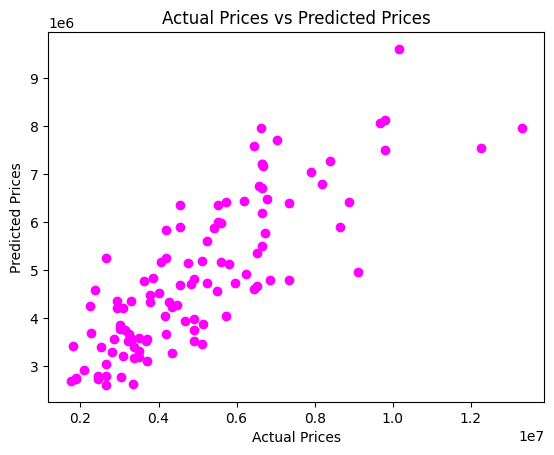

In [52]:
# Visualize predictions vs actual prices
plt.scatter(y_test, y_pred,color="magenta")
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual Prices vs Predicted Prices")
plt.show()

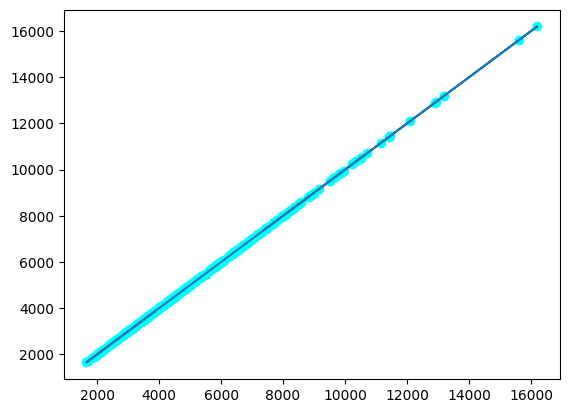

In [53]:
plt.scatter(data['area'],data['area'],color="cyan")
plt.plot(data['area'],data['area'])

### **WORKING OF ML USING LINEAR REGRESSION**

In [54]:
m=model.coef_
m

array([ 2.35968805e+02,  7.67787016e+04,  1.09444479e+06,  4.07476595e+05,
        2.24841913e+05,  3.67919948e+05,  2.31610037e+05,  3.90251176e+05,
        6.84649885e+05,  7.91426736e+05,  6.29890565e+05, -1.26881818e+05,
       -4.13645062e+05])

In [55]:
b=model.intercept_
b

260032.35760741215

In [56]:
inputx = 3200
output_price = m*inputx+b
output_price

array([ 1.01513253e+06,  2.45951878e+08,  3.50248335e+09,  1.30418514e+09,
        7.19754155e+08,  1.17760386e+09,  7.41412151e+08,  1.24906380e+09,
        2.19113967e+09,  2.53282559e+09,  2.01590984e+09, -4.05761784e+08,
       -1.32340417e+09])

## **SAVING THE MODEL**

In [57]:
# Save the model
joblib.dump(model, 'House_Price_Prediction_Model.pkl')

['House_Price_Prediction_Model.pkl']